# 50
ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [4]:
#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
import pandas as pd
file=pd.read_csv('newsCorpora.csv',sep='\t',header=None,names=['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP'])
file1=file[file['PUBLISHER'].isin(['Reuters','Huffington Post','Businessweek','Contactmusic.com','Daily Mail'])]


In [5]:
file1.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
12,13,Europe reaches crunch point on banking union,http://in.reuters.com/article/2014/03/10/eu-ba...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501755
13,14,ECB FOCUS-Stronger euro drowns out ECB's messa...,http://in.reuters.com/article/2014/03/10/ecb-p...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470501948
19,20,"Euro Anxieties Wane as Bunds Top Treasuries, S...",http://www.businessweek.com/news/2014-03-10/ge...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503148
20,21,Noyer Says Strong Euro Creates Unwarranted Eco...,http://www.businessweek.com/news/2014-03-10/no...,Businessweek,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.businessweek.com,1394470503366
29,30,REFILE-Bad loan triggers key feature in ECB ba...,http://in.reuters.com/article/2014/03/10/euroz...,Reuters,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,in.reuters.com,1394470505070


In [9]:
#3.抽出された事例をランダムに並び替える．
#4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．
from sklearn.model_selection import train_test_split
#x_trainとx_validに分ける。random_stateで、stratifyのラベルを偏らないようにする 
#x_train, x_valid1  = train_test_split( file1, train_size=0.8,shuffle=True,random_state=123)
#x_valid,x_test =train_test_split(x_valid1,train_size=0.5,shuffle=True,random_state=123)
x_train, x_valid1  = train_test_split( file1, train_size=0.8,shuffle=True,random_state=1)
x_valid,x_test =train_test_split(x_valid1,train_size=0.5,shuffle=True,random_state=1)

In [10]:
#学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．
print(x_train['CATEGORY'].value_counts())
print(x_valid['CATEGORY'].value_counts())
print(x_test['CATEGORY'].value_counts())

b    4543
e    4182
t    1213
m     734
Name: CATEGORY, dtype: int64
e    559
b    506
t    180
m     89
Name: CATEGORY, dtype: int64
b    578
e    538
t    131
m     87
Name: CATEGORY, dtype: int64


In [11]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
#4.ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ
x_train.to_csv("text.txt", sep="\t",index=False)
x_valid.to_csv("valid.txt", sep="\t", index=False)
x_test.to_csv("test..txt", sep="\t", index=False)
print(x_train)

            ID                                              TITLE  \
321821  322281  Fed's Bullard says jobs growth is 'ahead of sc...   
11584    11585  'The Bachelor:' Juan Pablo Galavis Attempts To...   
68297    68298  Health Care Law Changes Are Challenging The Ob...   
53206    53207                Conscious Uncoupling: What It Means   
196041  196477  Euro zone yields fall to new lows on ECB's cle...   
...        ...                                                ...   
349085  349545  UPDATE 1-Target 'respectfully' asks customers ...   
26546    26547     Ryan Gosling Attached To Busby Berkeley Biopic   
169667  170003        Seth Rogen - Seth Rogen was a bad neighbour   
385754  386214  One month after Casey Kasem's death his body S...   
6305      6306  Grant Gustin in costume as The Flash for new T...   

                                                      URL         PUBLISHER  \
321821  http://in.reuters.com/article/2014/06/26/usa-f...           Reuters   
11584   http:

# 51
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [12]:
#特徴量:TF-IDF
import string
import re

def preprocessing(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(table)  # 記号をスペースに置換                    
    text = text.lower()  # 小文字化                                         
    text = re.sub('[0-9]+', '0', text)  # 数字列を0に置換                   

    return text

file1=pd.concat([x_train,x_valid,x_test],axis=0)
file1.reset_index(drop=True,inplace=True)

#map(関数,シーケンス)
file1['TITLE']=file1['TITLE'].map(lambda x:preprocessing(x))


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
#初めからlen(x_train)+len(x_valid)まで
train_valid=file1[:len(x_train)+len(x_valid)]
test=file1[len(x_train)+len(x_valid):]

In [15]:
print(len(train_valid))
print(len(test))
print(len(file1))
print(len(x_train))
print(len(x_valid))

12006
1334
13340
10672
1334


In [16]:
train_valid=train_valid[['TITLE','CATEGORY']]
test=test[['TITLE','CATEGORY']]

In [17]:
#TfidfVectorizer: 文書群を与えると各文書をtf-idfの値を基にしたベクトルに変換する
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf =TfidfVectorizer(min_df=10,ngram_range=(1,2))

In [18]:
vec_tfidf

TfidfVectorizer(min_df=10, ngram_range=(1, 2))

In [19]:
#fit:入力の文書群を与えて語彙の獲得やidfの計算をする
#transform: fitしたことで得た語彙やidfを基に文書をtf-idf行列に変換する
train_valid_vec= vec_tfidf.fit_transform(train_valid['TITLE'])
test_vec= vec_tfidf.transform(test['TITLE'])

In [20]:
#ベクトルをデータフレームに変換
train_valid_feature=pd.DataFrame(train_valid_vec.toarray(),columns=vec_tfidf.get_feature_names())
#valid_feature=pd.DataFrame(valid_vec.toarray())
test_feature=pd.DataFrame(test_vec.toarray(),columns=vec_tfidf.get_feature_names())

In [21]:
train_feature= train_valid_feature[:len(x_train)]
valid_feature= train_valid_feature[len(x_train):]

# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
train_feature.to_csv("text.feature.txt", sep="\t",index=False)
valid_feature.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature.to_csv("test.feature.txt", sep="\t", index=False)

In [22]:
train_feature.head()

,0m,0million,0nd,0s,0st,0th,0th birthday,aa,aaliyah,abbvie,...,you to,young,your,your mother,yr,yuan,zac,zac efron,zendaya,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298871


# うまく行かなかった方
validとtestのfitをなくしたらうまくいった

In [102]:
train_f=x_train[['TITLE','CATEGORY']]
valid_f=x_valid[['TITLE','CATEGORY']]
test_f=x_test[['TITLE','CATEGORY']]

In [103]:
test_f

,TITLE,CATEGORY
6993,yen weakens versus most major peers kiwi appr...,b
7906,us debt falls for first time in 0 weeks on ukr...,b
9934,update 0 ford profit driven down by north amer...,b
12732,boeing to build largest 0 dreamliner in south ...,b
8001,us tv network fox to air live grease musical...,e
...,...,...
4500,level 0 agrees to buy tw telecom in 0 0 billi...,b
2512,robin thicke s new album is reportedly called ...,e
5600,kim kardashian wears pencil skirt and tank top...,e
9462,paul walker gets emotional mtv movie awards tr...,e


In [104]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfidf =TfidfVectorizer(min_df=10,ngram_range=(1,2))

In [112]:
train_vec= vec_tfidf.fit_transform(train_f['TITLE'])
#validとtestは同じ大きさだからfitする必要がない
valid_vec= vec_tfidf.transform(valid_f['TITLE'])
test_vec= vec_tfidf.transform(test_f['TITLE'])

In [113]:
print(train_vec)

  (0, 230)	0.31801413064933143
  (0, 180)	0.32893186774233096
  (0, 2281)	0.25211167895691217
  (0, 774)	0.13746379619790158
  (0, 229)	0.26657206050329907
  (0, 2095)	0.31255343182011514
  (0, 0)	0.3143003196338374
  (0, 816)	0.19274376182180666
  (0, 179)	0.30330518907239734
  (0, 1587)	0.28083229973254736
  (0, 861)	0.32423911776272596
  (0, 601)	0.32423911776272596
  (0, 2314)	0.1496871940621671
  (1, 1626)	0.39547815453899177
  (1, 755)	0.3004981499816169
  (1, 2325)	0.42384169662524923
  (1, 1448)	0.24843695819414208
  (1, 1875)	0.3599124335679201
  (1, 2129)	0.3118478888752606
  (1, 691)	0.3628283462524844
  (1, 1728)	0.3917967721511741
  (2, 141)	0.4179578636311192
  (2, 1489)	0.31123991557078523
  (2, 1768)	0.3661976037224127
  (2, 127)	0.19393920181596058
  :	:
  (10668, 1647)	0.3352702904770304
  (10668, 979)	0.32530911530134643
  (10668, 833)	0.3575877702147
  (10669, 16)	0.45785228895818497
  (10669, 1084)	0.35550200028120127
  (10669, 1027)	0.45279510485977154
  (10669, 1

In [116]:
#ベクトルをデータフレームに変換
train_feature=pd.DataFrame(train_vec.toarray(),columns=vec_tfidf.get_feature_names())
valid_feature=pd.DataFrame(valid_vec.toarray(),columns=vec_tfidf.get_feature_names())
test_feature=pd.DataFrame(test_vec.toarray(),columns=vec_tfidf.get_feature_names())

In [117]:
print(train_feature)

           0m   0s  0st  0th  0th birthday   aa  abbvie  abc  about  \
0      0.3143  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
1      0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
2      0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
3      0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
4      0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
...       ...  ...  ...  ...           ...  ...     ...  ...    ...   
10667  0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
10668  0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
10669  0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
10670  0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   
10671  0.0000  0.0  0.0  0.0           0.0  0.0     0.0  0.0    0.0   

       about the  ...  you can  you need  young  your  your mother   yr  yuan  \
0            0.0  ...      0.0       0.0    0.0   0.0          0.0

In [118]:
# テキストファイル（カンマ以外の区切り文字）として（ヘッダーあり）
train_feature.to_csv("text.feature.txt", sep="\t")
valid_feature.to_csv("valid.feature.txt", sep="\t", index=False)
test_feature.to_csv("test.feature.txt", sep="\t", index=False)

# 52
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [42]:
#カテゴリをfloatに直さないと could not convert string to float: 'b'

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
#lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#上のエラーが出る場合はmax_iterのデフォルト100回で収束しなかったということなので回数を増やしたら良い

In [24]:
lr.fit(train_feature,x_train['CATEGORY'])

LogisticRegression(max_iter=200)

# 53
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [25]:
lr.predict(train_feature)

array(['b', 'e', 'b', ..., 'e', 'e', 'e'], dtype=object)

In [26]:
#predict:メソッドに説明変数を与えてターゲットを予測。proba:クラスの分類確率
#
train_predict=[lr.predict(train_feature),lr.predict_proba(train_feature)]
valid_predict=[lr.predict(valid_feature),lr.predict_proba(valid_feature)]
test_predict=[lr.predict(test_feature),lr.predict_proba(test_feature)]

In [27]:
train_predict[1]

array([[0.97082327, 0.0130321 , 0.00454426, 0.01160037],
       [0.04663677, 0.89760856, 0.01583981, 0.03991486],
       [0.52552952, 0.22547133, 0.21947175, 0.02952741],
       ...,
       [0.06405075, 0.89129133, 0.0183695 , 0.02628842],
       [0.16322241, 0.77174836, 0.04572956, 0.01929967],
       [0.06400788, 0.84477934, 0.03110386, 0.06010892]])

In [28]:
pd.DataFrame(train_predict[1],columns=['b','t','e','?'])
#4列になっているのはe,b,t,?の確率を求めるため

,b,t,e,?
0,0.970823,0.013032,0.004544,0.011600
1,0.046637,0.897609,0.015840,0.039915
2,0.525530,0.225471,0.219472,0.029527
3,0.205953,0.678265,0.055104,0.060678
4,0.970827,0.011337,0.005815,0.012020
...,...,...,...,...
10667,0.755419,0.100169,0.037265,0.107147
10668,0.053027,0.895114,0.020738,0.031120
10669,0.064051,0.891291,0.018370,0.026288
10670,0.163222,0.771748,0.045730,0.019300


In [29]:
print(train_predict)
print('-------------------')
print(valid_predict)
print('-------------------')
print(test_predict)

[array(['b', 'e', 'b', ..., 'e', 'e', 'e'], dtype=object), array([[0.97082327, 0.0130321 , 0.00454426, 0.01160037],
       [0.04663677, 0.89760856, 0.01583981, 0.03991486],
       [0.52552952, 0.22547133, 0.21947175, 0.02952741],
       ...,
       [0.06405075, 0.89129133, 0.0183695 , 0.02628842],
       [0.16322241, 0.77174836, 0.04572956, 0.01929967],
       [0.06400788, 0.84477934, 0.03110386, 0.06010892]])]
-------------------
[array(['e', 'b', 'b', ..., 'b', 'e', 'b'], dtype=object), array([[0.1532157 , 0.61420847, 0.09803953, 0.13453629],
       [0.93157652, 0.0387068 , 0.01298641, 0.01673027],
       [0.47425592, 0.18121028, 0.06980282, 0.27473098],
       ...,
       [0.82071775, 0.08072607, 0.03385281, 0.06470337],
       [0.00906041, 0.9818758 , 0.00513609, 0.0039277 ],
       [0.96225979, 0.01668099, 0.01281102, 0.0082482 ]])]
-------------------
[array(['b', 'b', 'm', ..., 't', 't', 'e'], dtype=object), array([[0.91539038, 0.03721348, 0.019241  , 0.02815515],
       [0.9231

# 54
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
#x_trainのcategory・メソッドに説明変数を与えて予測したターゲットを引数にとる
train_accuracy=accuracy_score(x_train['CATEGORY'], train_predict[0])
valid_accuracy=accuracy_score(x_valid['CATEGORY'], valid_predict[0])
test_accuracy=accuracy_score(x_test['CATEGORY'], test_predict[0])

In [78]:
print('train_accuracy:',train_accuracy)
print('test_accuracy:',test_accuracy)
print('valid_accuracy:',valid_accuracy)

train_accuracy: 0.924756371814093
test_accuracy: 0.8725637181409296
valid_accuracy: 0.8733133433283359


In [32]:
print('train_accuracy:',train_accuracy)
print('test_accuracy:',test_accuracy)

train_accuracy: 0.924756371814093
test_accuracy: 0.8725637181409296


# 55
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#クラス分類問題の結果を実際のクラスと予測したクラスを軸にしてまとめたもの
train_confusion= confusion_matrix(x_train['CATEGORY'],train_predict[0])
valid_confusion= confusion_matrix(x_valid['CATEGORY'],valid_predict[0])
test_confusion= confusion_matrix(x_test['CATEGORY'],test_predict[0])

In [35]:
print('train_confusion_matrix:\n',train_confusion)
print('valid_confusion_matrix:\n',valid_confusion)
print('test_confusion_matrix:\n',test_confusion)

train_confusion_matrix:
 [[4382   96    8   57]
 [  52 4118    4    8]
 [  97  137  493    7]
 [ 196  133    8  876]]
valid_confusion_matrix:
 [[481  14   5   6]
 [  7 548   0   4]
 [ 20  21  46   2]
 [ 48  39   3  90]]
test_confusion_matrix:
 [[533  32   1  12]
 [ 18 517   0   3]
 [ 16  23  45   3]
 [ 29  32   1  69]]


<AxesSubplot:>

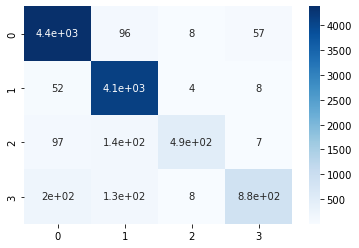

In [36]:
sns.heatmap(train_confusion,annot=True,cmap='Blues')

# 56
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
#適合率　正解と推測結果を引数にとる
test_precision_mi=precision_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_precision_score micro:',test_precision_mi)
test_precision_ma=precision_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_precision_score macro:',test_precision_ma)
      

test_precision_score micro: 0.8725637181409296
test_precision_score macro: 0.8752014559251464


In [39]:
#再現率　正解と推測結果を引数にとる
test_recall_mi=recall_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_recall_score micro:',test_recall_mi)
test_recall_ma=recall_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_recall_score macro:',test_recall_ma)

test_recall_score micro: 0.8725637181409296
test_recall_score macro: 0.7317677020082264


In [40]:
#F1値正解と推測結果を引数にとる
test_f1_mi=f1_score(x_test['CATEGORY'],test_predict[0],average='micro')
print('test_f1_score micro:',test_f1_mi)
test_f1_ma=f1_score(x_test['CATEGORY'],test_predict[0],average='macro')
print('test_f1_score macro:',test_f1_ma)

test_f1_score micro: 0.8725637181409295
test_f1_score macro: 0.779526300023615


In [41]:
# Noneを指定するとクラスごとの精度をndarrayで返す
test_precision=precision_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_precision_score:',test_precision)
test_recall=recall_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_recall_score:',test_recall)
test_f1=f1_score(x_test['CATEGORY'],test_predict[0],average=None, labels=['b', 'e', 't', 'm'])
print('test_f1_score:',test_f1)



test_precision_score: [0.8942953  0.85596026 0.79310345 0.95744681]
test_recall_score: [0.92214533 0.96096654 0.52671756 0.51724138]
test_f1_score: [0.90800681 0.90542907 0.63302752 0.67164179]


In [42]:
import numpy as  np
precision = test_precision
precision = np.append(precision, test_precision_mi)  # 末尾にマイクロ平均を追加
precision = np.append(precision, test_precision_ma)  # 末尾にマクロ平均を追加

 #再現率
recall = test_recall
recall = np.append(recall, test_recall_mi)
recall = np.append(recall, test_recall_ma)

  # F1スコア
f1 = test_f1
f1 = np.append(f1, test_f1_mi)
f1 = np.append(f1, test_f1_ma)


# 結果を結合してデータフレーム化
scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                        index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
print(scores)

             適合率       再現率     F1スコア
b       0.894295  0.922145  0.908007
e       0.855960  0.960967  0.905429
t       0.793103  0.526718  0.633028
m       0.957447  0.517241  0.671642
マイクロ平均  0.872564  0.872564  0.872564
マクロ平均   0.875201  0.731768  0.779526


# 57
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [43]:
lr.coef_#重み係数

array([[ 0.16579188, -0.22867706,  0.27801495, ..., -0.51486025,
        -0.29816339,  0.56114576],
       [ 0.57655855,  0.24650312, -0.1160406 , ...,  1.01470923,
         0.52464163, -0.50334478],
       [-0.13089757,  0.29462832, -0.05151306, ..., -0.24437909,
        -0.09028596,  0.0281153 ],
       [-0.61145286, -0.31245438, -0.11046129, ..., -0.25546989,
        -0.13619228, -0.08591627]])

In [45]:
features = train_feature.columns.values#列名をリストとして取得する
index = [i for i in range(1, 11)]
for c, coef in zip(lr.classes_, lr.coef_):#全てのカテゴリについて
    print(f'【カテゴリ】{c}')
    best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T
    worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
    display(pd.concat([best10, worst10], axis=0))
    print('\n')


【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,fed,bank,ecb,china,stocks,oil,euro,ukraine,yellen,dollar
重要度下位,her,ebola,video,and,she,aereo,virus,star,apple,tv




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,her,film,movie,jay,kim,star,she,beyonce
重要度下位,update,us,google,china,facebook,study,says,gm,ceo,billion




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,cancer,fda,drug,mers,health,cdc,cigarettes,cases
重要度下位,facebook,gm,apple,twitter,sales,bank,google,climate,ceo,deal




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,nasa,gm,tesla,heartbleed,fcc
重要度下位,stocks,fed,drug,cancer,percent,american,day,ecb,ukraine,her


In [50]:
print(train_feature.columns)
print( train_feature.columns.values)
print(train_feature.head())

Index(['0m', '0million', '0nd', '0s', '0st', '0th', '0th birthday', 'aa',
       'aaliyah', 'abbvie',
       ...
       'you to', 'young', 'your', 'your mother', 'yr', 'yuan', 'zac',
       'zac efron', 'zendaya', 'zone'],
      dtype='object', length=2825)
['0m' '0million' '0nd' ... 'zac efron' 'zendaya' 'zone']
    0m  0million  0nd   0s  0st  0th  0th birthday   aa  aaliyah  abbvie  ...  \
0  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
1  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
2  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
3  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
4  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   

   you to  young  your  your mother   yr  yuan  zac  zac efron  zendaya  \
0     0.0    0.0   0.0          0.0  0.0   0.0  0.0        0.0      0.0   
1     0.0    0.0   0.0          0.0  0.0   0.0  

# 58
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [66]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
C_list=[10 ** i for i in range(-5, 4)]
result=[]
for C in C_list:
    clr=LogisticRegression(C=C,max_iter=10000)
    clr.fit(train_feature,x_train['CATEGORY'])
    train_predict_c=[clr.predict(train_feature),clr.predict_proba(train_feature)]
    valid_predict_c=[clr.predict(valid_feature),clr.predict_proba(valid_feature)]
    test_predict_c=[clr.predict(test_feature),clr.predict_proba(test_feature)]
    
    train_accuracy_c=accuracy_score(x_train['CATEGORY'], train_predict_c[0])
    valid_accuracy_c=accuracy_score(x_valid['CATEGORY'], valid_predict_c[0])
    test_accuracy_c=accuracy_score(x_test['CATEGORY'], test_predict_c[0])
    
    result.append([C,train_accuracy_c,valid_accuracy_c,test_accuracy_c])

In [67]:
result=np.array(result).T
result

array([[1.00000000e-05, 1.00000000e-04, 1.00000000e-03, 1.00000000e-02,
        1.00000000e-01, 1.00000000e+00, 1.00000000e+01, 1.00000000e+02,
        1.00000000e+03],
       [4.25693403e-01, 4.25693403e-01, 4.41341829e-01, 7.53467016e-01,
        8.05472264e-01, 9.24756372e-01, 9.81259370e-01, 9.97376312e-01,
        9.98219640e-01],
       [3.79310345e-01, 3.79310345e-01, 4.01799100e-01, 7.39880060e-01,
        7.85607196e-01, 8.73313343e-01, 8.89805097e-01, 8.70314843e-01,
        8.59820090e-01],
       [4.33283358e-01, 4.33283358e-01, 4.58020990e-01, 7.72113943e-01,
        7.99850075e-01, 8.72563718e-01, 8.86056972e-01, 8.71814093e-01,
        8.56821589e-01]])

<function matplotlib.pyplot.show(close=None, block=None)>

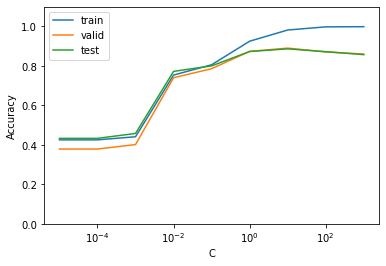

In [68]:
import matplotlib.pyplot as plt

plt.plot(result[0],result[1],label='train')
plt.plot(result[0],result[2],label='valid')
plt.plot(result[0],result[3],label='test')
plt.ylim(0,1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show

正則化が強すぎる(Cが小さい)と学習が進まず精度が低く、正則化が弱すぎる(Cが大きい)と過学習してしまうことから、適切なCを選ぶことが重要であることが分かる。

# 59
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [57]:
import optuna

L1正則化とL2正則化のバランスを指定するl1_ratioを対象にパラメータ探索

In [69]:
def objective_lg(trial):
    l1_ratio =trial.suggest_uniform('l1_ratio',0,1)#name, low, high Suggest a value
    C=trial.suggest_loguniform('C',1e-4,1e4)#name, low, high  Suggest a value for the continuous parameter.
    
    params= {
        'random_state':123,
        'max_iter':10000, #Maximum number of iterations
        'penalty':'elasticnet',#正則化の仕方を決めるパラメータ 。このときboth L1 and L2 penalty terms are added
        'solver': 'saga',#最適なパラメータの探索方法を設定
        'l1_ratio':l1_ratio,#penaltyがelasticnetの時のみに使われ、0 < l1_ratio <1,のときはpenaltyがL1とL2の組み合わせになる
        'C':C   #正則化の強度     
    }
    lr=LogisticRegression(**params)
    lr.fit(train_feature,x_train['CATEGORY'])
    #予測値の取得
    valid_pred=[np.max(lr.predict_proba(valid_feature), axis=1), lr.predict(valid_feature)]
    valid_accuracy=accuracy_score(x_valid['CATEGORY'],valid_pred[1])
    return valid_accuracy

In [70]:
study=optuna.create_study(direction='maximize')
study.optimize(objective_lg,timeout=3600)

[I 2022-05-17 20:04:26,375] A new study created in memory with name: no-name-457c9941-0e57-4fa8-bade-aaba6ddb10b0
[I 2022-05-17 20:04:47,414] Trial 0 finished with value: 0.3793103448275862 and parameters: {'l1_ratio': 0.010026615952536067, 'C': 0.00015862259903855666}. Best is trial 0 with value: 0.3793103448275862.
[I 2022-05-17 20:05:07,635] Trial 1 finished with value: 0.5427286356821589 and parameters: {'l1_ratio': 0.10558102628348676, 'C': 0.008615383602869524}. Best is trial 1 with value: 0.5427286356821589.
[I 2022-05-17 20:05:14,533] Trial 2 finished with value: 0.3793103448275862 and parameters: {'l1_ratio': 0.7056095942888116, 'C': 0.0068743674158458935}. Best is trial 1 with value: 0.5427286356821589.
[I 2022-05-17 20:05:15,492] Trial 3 finished with value: 0.3793103448275862 and parameters: {'l1_ratio': 0.9500866565423438, 'C': 0.0002375757114957194}. Best is trial 1 with value: 0.5427286356821589.
[I 2022-05-17 20:05:43,068] Trial 4 finished with value: 0.7533733133433284

In [71]:
print('Best trial:')
trial=study.best_trial
print(' Value:{:.3f}'.format(trial.value))
print(' Params:')
for key ,value in trial.params.items():
    print('    {}: {}'.format(key, value))
  

Best trial:
 Value:0.879
 Params:
    l1_ratio: 0.9555906712961445
    C: 1.3085302250711177


In [77]:
#ミス
l1_ratio_1 = trial.params['l1_ratio']#探索したパラメータで再度モデルを学習
C_1 = trial.params['C']


lr_1=LogisticRegression(random_state=123, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio_1, 
                        C=C)
lr_1.fit(train_feature,x_train['CATEGORY'])

valid_pred_1=[np.max(lr.predict_proba(valid_feature), axis=1), lr.predict(valid_feature)]
valid_accuracy_1=accuracy_score(x_valid['CATEGORY'],valid_pred_1[1])
train_pred_1=[np.max(lr.predict_proba(train_feature), axis=1), lr.predict(train_feature)]
train_accuracy_1=accuracy_score(x_train['CATEGORY'],train_pred_1[1])
test_pred_1=[np.max(lr.predict_proba(test_feature), axis=1), lr.predict(test_feature)]
test_accuracy_1=accuracy_score(x_test['CATEGORY'],test_pred_1[1])

print(f'正解率（学習データ）：{train_accuracy_1:.3f}')
print(f'正解率（検証データ）：{valid_accuracy_1:.3f}')
print(f'正解率（評価データ）：{test_accuracy_1:.3f}')

正解率（学習データ）：0.925
正解率（検証データ）：0.873
正解率（評価データ）：0.873


In [84]:
l1_ratio_1 = trial.params['l1_ratio']#探索したパラメータで再度モデルを学習
C_1 = trial.params['C']


lr_1=LogisticRegression(random_state=123, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio_1, 
                        C=C)
lr_1.fit(train_feature,x_train['CATEGORY'])

valid_pred_1=[np.max(lr_1.predict_proba(valid_feature), axis=1), lr_1.predict(valid_feature)]
valid_accuracy_1=accuracy_score(x_valid['CATEGORY'],valid_pred_1[1])
train_pred_1=[np.max(lr_1.predict_proba(train_feature), axis=1), lr_1.predict(train_feature)]
train_accuracy_1=accuracy_score(x_train['CATEGORY'],train_pred_1[1])
test_pred_1=[np.max(lr_1.predict_proba(test_feature), axis=1), lr_1.predict(test_feature)]
test_accuracy_1=accuracy_score(x_test['CATEGORY'],test_pred_1[1])

正解率（学習データ）：0.998
正解率（検証データ）：0.857
正解率（評価データ）：0.849


In [85]:
print(f'正解率（学習データ）：{train_accuracy_1:.3f}')
print(f'正解率（検証データ）：{valid_accuracy_1:.3f}')
print(f'正解率（評価データ）：{test_accuracy_1:.3f}')

正解率（学習データ）：0.998
正解率（検証データ）：0.857
正解率（評価データ）：0.849


正解率（学習データ）：0.998<br>
正解率（検証データ）：0.857<br>
正解率（評価データ）：0.849という結果が出た。<br>
train_accuracy: 0.924756371814093<br>
valid_accuracy: 0.8733133433283359<br>
test_accuracy: 0.8725637181409296<br>
であったので学習データの正解率が上がった。(本当は評価データの結果がよくなるはず)

In [83]:
l1_ratio_1

0.9555906712961445

In [95]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_feature, x_train['CATEGORY'])

MultinomialNB()

In [96]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [97]:
accuracy(nb, feature_train, train['CATEGORY'])

NameError: name 'accuracy' is not defined